In [1]:
import io
import os
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

import json #converting JSON to lists for dataframe
import warnings
warnings.filterwarnings('ignore')
import base64
import codecs
from IPython.display import HTML

%matplotlib inline

In [2]:
movie1 = pd.read_csv(r"D:\ml\tmdb_5000_movies.csv")
movie2 = pd.read_csv(r"D:\ml\tmdb_5000_credits.csv")

movies = movie1.merge(movie2,left_on='id',right_on='movie_id',how='left')# merging the two csv files

In [3]:
counts = movies[(movies['vote_average']==0)]['vote_count'] # get vote counts for all movies that have a rating of 0.0

print("Unique vote counts for movies with 0.0 rating")
for u in set(counts):
    print(u)

Unique vote counts for movies with 0.0 rating
0
1


In [4]:
movies = movies[(movies['vote_average']!=0)]

In [5]:
movies.sample(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
4752,65000,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",http://tinyfurniture.com/,47607,"[{""id"": 1156, ""name"": ""sister sister relations...",en,Tiny Furniture,"After graduating from film school, Aura return...",2.380332,"[{""name"": ""Tiny Ponies"", ""id"": 65873}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Aura would like you to know that she is having...,Tiny Furniture,5.6,59,47607,Tiny Furniture,"[{""cast_id"": 12, ""character"": ""Aura"", ""credit_...","[{""credit_id"": ""52fe473bc3a36847f812a649"", ""de..."
3936,3000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",http://www.tsotsimovie.com/,868,"[{""id"": 100, ""name"": ""slum""}, {""id"": 1009, ""na...",af,Tsotsi,The South African multi-award winning film abo...,2.504169,"[{""name"": ""Movieworld Productions"", ""id"": 563}...",...,"[{""iso_639_1"": ""af"", ""name"": ""Afrikaans""}, {""i...",Released,In this world... Redemption comes just once.,Tsotsi,6.9,94,868,Tsotsi,"[{""cast_id"": 14, ""character"": ""Tsotsi"", ""credi...","[{""credit_id"": ""52fe4285c3a36847f802545f"", ""de..."
1257,40000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",http://www.foxsearchlight.com/fantasticmrfox/,10315,"[{""id"": 2527, ""name"": ""fox""}, {""id"": 3352, ""na...",en,Fantastic Mr. Fox,The Fantastic Mr. Fox bored with his current l...,41.258956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Dig the life fantastic!,Fantastic Mr. Fox,7.5,1176,10315,Fantastic Mr. Fox,"[{""cast_id"": 4, ""character"": ""Mr. Fox (voice)""...","[{""credit_id"": ""52fe43579251416c7500cb7f"", ""de..."
1267,40000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",NaN,7288,[],en,Duplex,"When a young couple buys their dream home, the...",15.590001,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Duplex,5.9,482,7288,Duplex,"[{""cast_id"": 1, ""character"": ""Alex Rose"", ""cre...","[{""credit_id"": ""52fe4477c3a36847f809798b"", ""de..."
1409,35000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://jedgarmovie.warnerbros.com/dvd/,88794,"[{""id"": 5565, ""name"": ""biography""}, {""id"": 616...",en,J. Edgar,As the face of law enforcement in America for ...,28.069419,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The most powerful man in the world.,J. Edgar,6.0,741,88794,J. Edgar,"[{""cast_id"": 1, ""character"": ""J. Edgar Hoover""...","[{""credit_id"": ""52fe4a039251416c910c04df"", ""de..."


In [8]:
def to_list(df, feature_names_list): #df: dataframe, feature_names: list of all features to convert from JSON to list
    for feature_name in feature_names_list:
        print("Current:", feature_name)
        #STEP 1: convert JSON format to a list
        df[feature_name]=df[feature_name].apply(json.loads)
        #Two cases here: Feature is crew, or feature is not crew
        if feature_name == 'crew': #if crew, due to large size, want to limit to most influential members: director, editor, cinematographer, screenplay, and composer
            for index,i in zip(df.index,df[feature_name]):
                feature_list_1=[]
                limit = 10
                if len(i) < 10:
                    limit = len(i)
                for j in range(limit): #top 10 crew members
                    feature_list_1.append((i[j]['name'])) # the key 'name' contains the name of the a sub-feature (ex: sci-fi in genres)
                df.loc[index,feature_name]= str(feature_list_1)
        
        elif feature_name == 'cast': #Another special case. Only want top 5 cast members (most infulential)
            for index,i in zip(df.index,df[feature_name]):
                feature_list_1=[]
                if len(i) > 5:
                    limit = 5
                else:
                    limit = len(i)
                for j in range(limit): #top 5 (JSON format already has this sorted)
                    feature_list_1.append((i[j]['name']))
                df.loc[index,feature_name]= str(feature_list_1)
        else:    
            for index,i in zip(df.index,df[feature_name]):
                feature_list_1=[]
                for j in range(len(i)):
                    feature_list_1.append((i[j]['name']))
                df.loc[index,feature_name]= str(feature_list_1)
    
        #STEP 2: clean up and transform into unsorted list
        df[feature_name] = df[feature_name].str.strip('[]').str.replace(' ','').str.replace("'",'')
        df[feature_name] = df[feature_name].str.split(',')
        
        #STEP 3: Sort list elements
        for i,j in zip(df[feature_name],df.index):
            features_list_2=i
            features_list_2.sort()
            df.loc[j,feature_name]=str(features_list_2)
        df[feature_name]=df[feature_name].str.strip('[]').str.replace(' ','').str.replace("'",'')
        lst = df[feature_name].str.split(',')
        if len(lst) == 0:
            df[feature_name] = None
        else:
            df[feature_name]= df[feature_name].str.split(',')
    return df

In [9]:
movies = to_list(movies, ['genres', 'keywords', 'production_companies', 'cast', 'crew']) #function call

Current: genres
Current: keywords
Current: production_companies
Current: cast
Current: crew


In [10]:
to_drop = []
for i in movies.index:
    if (movies['production_companies'][i] == [''] and movies['cast'][i] == [''] and 
        movies['crew'][i] == ['']):
        to_drop.append(i)
print('Dropping', str(len(to_drop)), 'movies.')
movies = movies.drop(to_drop, axis = 0)

Dropping 8 movies.


In [11]:
movies.shape[0]

4732

In [12]:
movies_shortened = movies[['id','original_title','genres','cast', 'crew', 'production_companies', 'keywords', 'vote_average']]

In [13]:
movies_shortened.sample(10)

,id,original_title,genres,cast,crew,production_companies,keywords,vote_average
2108,162,Edward Scissorhands,"[Drama, Fantasy, Romance]","[AlanArkin, AnthonyMichaelHall, DianneWiest, J...","[CarolineThompson, CarolineThompson, ColleenAt...",[TwentiethCenturyFoxFilmCorporation],"[burglar, hairdresser, inventor, loveatfirstsi...",7.5
2205,15070,Undisputed,"[Action, Adventure, Drama, Thriller]","[JonSeda, MichaelRooker, PeterFalk, VingRhames...","[CamilleFriend, DavidGiler, WalterHill]","[AmenRaFilms, MiramaxFilms]",[sport],6.1
3907,10285,Jason Goes to Hell: The Final Friday,"[Fantasy, Horror, Thriller]","[JohnD.LeMay, KaneHodder, KariKeegan, StevenCu...","[AdamMarcus, BillDill, DavidHandman, DeanLorey...","[NewLineCinema, SeanS.CunninghamFilms]","[camping, diner, femalenudity, hockeymask, ind...",4.2
4415,92635,Snow White: A Deadly Summer,"[Horror, Thriller]","[EricRoberts, MaureenMcCormick, R.J.Cantu, Sha...","[BarbaraKymlicka, BarryBarnholtz, BillyJett, D...",[],[],4.8
668,9947,Elektra,"[Action, Fantasy]","[Cary-HiroyukiTagawa, GoranVisnjic, JenniferGa...","[ArnonMilchan, AviArad, CoreenMayrs, CraigBerk...","[ElektraProductions, EpsilonMotionPictures, Ho...","[basedoncomicbook, femaleassassin, martialarts...",4.8
861,2841,Un long dimanche de fiançailles,[Drama],"[AndréDussollier, AudreyTautou, ChantalNeuwirt...","[AlineBonetto, AngeloBadalamenti, BrunoDelbonn...","[2003Productions, Canal+, CentreNationaldelaCi...","[amnesia, bodilydisabledperson, brittany, disa...",7.1
541,9425,Soldier,"[Action, ScienceFiction, War]","[ConnieNielsen, JasonIsaacs, JasonScottLee, Ku...","[DavidL.Snyder, DavidTattersall, DavidWebbPeop...","[ImpactPictures, JerryWeintraubProductions, Mo...","[alienplanet, dystopia, geneticengineering, sp...",6.1
2032,10445,Shadowlands,"[Drama, Romance]","[AnthonyHopkins, DebraWinger, JohnWood, Julian...","[GeorgeFenton, LesleyWalker, MichaelLamont, Pe...","[SavoyPictures, ShadowlandsProductions]","[author, bachelor, brother, fallinginlove, oxf...",6.8
339,9806,The Incredibles,"[Action, Adventure, Animation, Family]","[CraigT.Nelson, DominiqueLouis, HollyHunter, J...","[AngusMacLane, BrynImagire, BrynImagire, JohnL...","[PixarAnimationStudios, WaltDisneyPictures]","[hero, island, lawsuit, secret, secretidentity...",7.4
3520,455,Bend It Like Beckham,"[Comedy, Drama, Romance]","[AnupamKher, JonathanRhysMeyers, KeiraKnightle...","[DeepakNayar, GuljitBindra, GurinderChadha, Gu...","[FilmförderungHamburg, FoxSearchlightPictures,...","[""womenssoccer"", cultureclash, family, immigra...",6.2


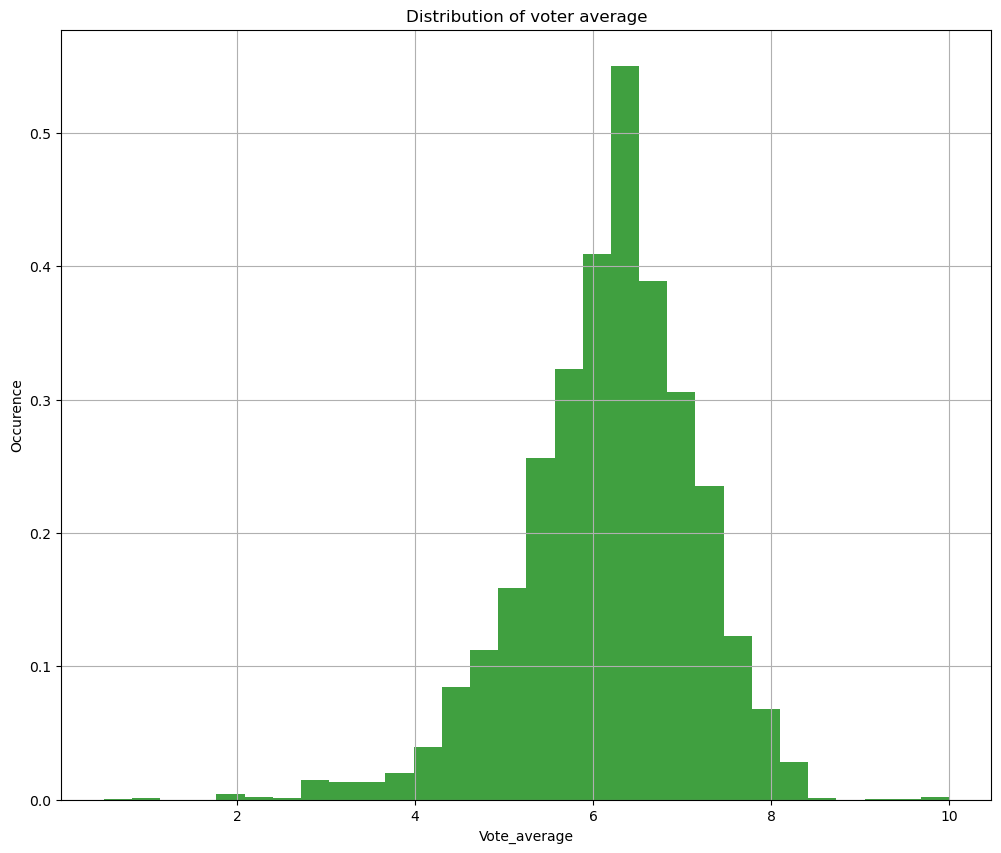

Minimum of Ratings: 0.5
Maximum of Ratings: 10.0
Average of Ratings: 6.17
Variance of Ratings: 0.93


In [14]:
plt.subplots(figsize=(12,10))
n, bins, patches = plt.hist(movies_shortened['vote_average'], 30, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Vote_average')
plt.ylabel('Occurence')
plt.title('Distribution of voter average')
plt.grid(True)
plt.show()
print("Minimum of Ratings:", round(min(movies_shortened['vote_average']),2))
print("Maximum of Ratings:", round(max(movies_shortened['vote_average']),2))
print("Average of Ratings:", round(np.mean(movies_shortened['vote_average']),2))
print("Variance of Ratings:",round(np.var(movies_shortened['vote_average']),2))


In [15]:
def generate_list(df, feature_name): #create a list of all unique feature values
    #Step 1: track all ratings associated with each feature in a dictionary
    feature_dict = {}
    for index, row in df.iterrows():
        feat = row[feature_name]
        for sub_feat in feat:
            if sub_feat not in feature_dict:
                feature_dict[sub_feat] = (df['vote_average'][index], 1) #
            else:
                feature_dict[sub_feat] = (feature_dict[sub_feat][0] + (df['vote_average'][index]), feature_dict[sub_feat][1] + 1)
    #Step 2: calculate average ratings for each feature
    for key in feature_dict:
        feature_dict[key] = feature_dict[key][0]/feature_dict[key][1] #average of all vote_averages
       
    #Step 3: create and sort a list of tuples (dictionary value, key)
    lst = list()
    for name in feature_dict:
        lst.append((feature_dict[name],name))
    lst = sorted(lst)
    #step 4: create a list of only the feature names, from lowest rating to highest rating
    feature_list = list()
    ratings_list = list()
    for element in lst:
        feature_list.append(element[1])
        ratings_list.append(element[0])
    
    #get the variance of the ratings. This is helpful for determining the usefulness of the information (to be displayed in below plot)
    var = round(np.var(ratings_list),3)
    
    #before returning the list, do a quick visualization to show that generate_list works
    fig, ax = plt.subplots(figsize=(6,5))
    if feature_name != 'genres':
        n = 50 # sample at intervals of n
    else:
        n = 1
    X = [] #sample for associated movie(s) rating average
    Y = [] #sample for feature names
    for i in range(0, len(feature_list) - 1, n):
        X.append(ratings_list[i])
        Y.append(feature_list[i])
    
    y_pos = np.arange(len(Y))
    ax.barh(y_pos, X, align='center')
    #ax.set_yticklabels(Y)
    ax.invert_yaxis()  # labels read top-to-bottom
    
    ax.set_xlabel('Overall average movie ratings')
    ax.set_ylabel(feature_name + ' sample list index')
    ax.set_title(feature_name + ' to associated movie(s) performance (' + str(int(len(feature_list)/n)) + ' samples), variance: ' + str(var))
    
    plt.show()
    
    return feature_list


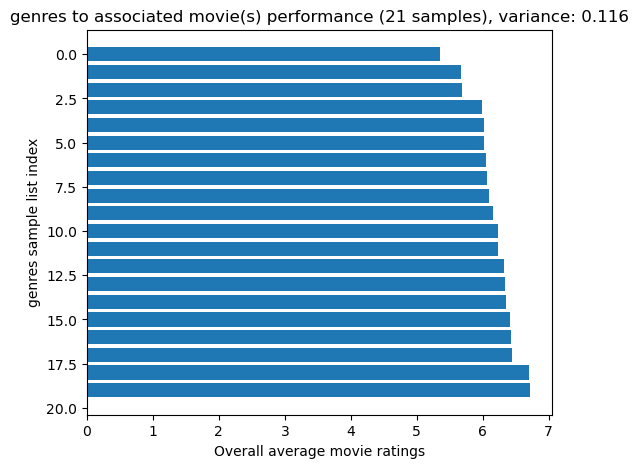

In [16]:
genres_list = generate_list(movies_shortened, 'genres')

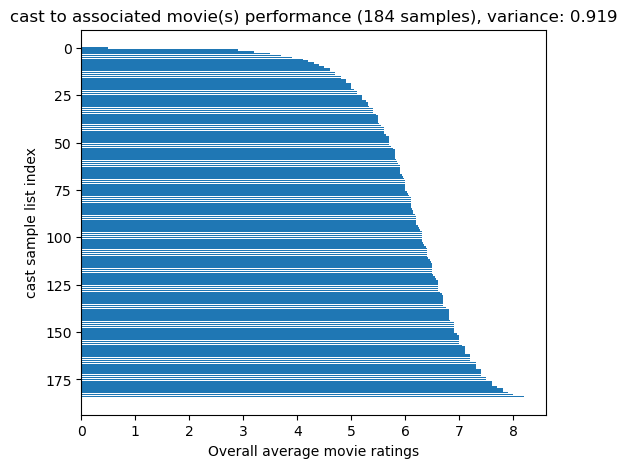

In [17]:
cast_list = generate_list(movies_shortened, 'cast')

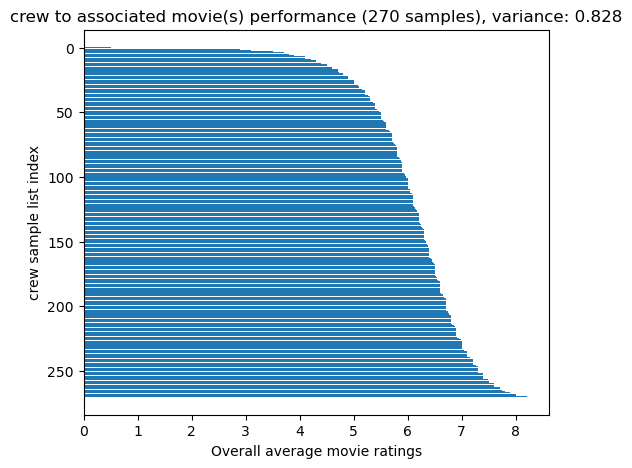

In [18]:
crew_list = generate_list(movies_shortened, 'crew')

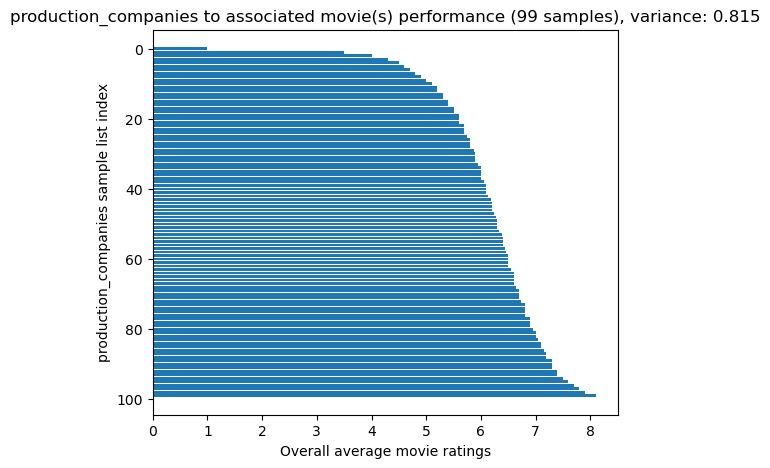

In [19]:
prod_companies_list = generate_list(movies_shortened, 'production_companies')

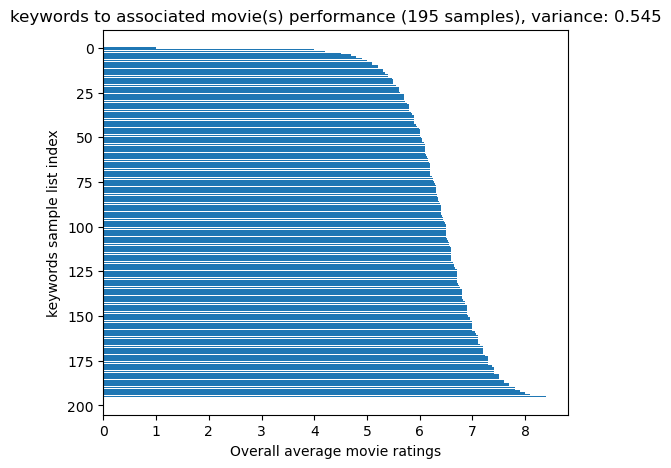

In [20]:
keywords_list = generate_list(movies_shortened, 'keywords')

In [21]:
movies_shortened = movies_shortened[['id', 'original_title', 'cast', 'crew', 'production_companies', 'keywords','vote_average']]

In [22]:
def calculate_bin_array(this_list, all_features):
    bin_list = []
    for element in all_features:
        if element in this_list:
            bin_list.append(1)
        else:
            bin_list.append(0)
    return bin_list

In [23]:
movies_shortened['cast'] = movies_shortened['cast'].apply(lambda x: calculate_bin_array(x, cast_list))

In [24]:
movies_shortened['crew'] = movies_shortened['crew'].apply(lambda x: calculate_bin_array(x, crew_list))

In [25]:
movies_shortened['production_companies'] = movies_shortened['production_companies'].apply(lambda x: calculate_bin_array(x, prod_companies_list))

In [26]:
movies_shortened['keywords'] = movies_shortened['keywords'].apply(lambda x: calculate_bin_array(x, keywords_list))

In [27]:
movies_shortened.sample(10)

,id,original_title,cast,crew,production_companies,keywords,vote_average
2008,6973,In the Valley of Elah,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.6
2758,5172,The Astronaut Farmer,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.2
3968,176077,Enter the Dangerous Mind,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.8
3660,12486,Farce of the Penguins,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.2
1903,11152,The Ruins,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.6
4790,13898,دایره,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.6
1295,8842,Against the Ropes,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.5
4637,32222,American Desi,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0
3815,29715,Major Dundee,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.2
536,1439,Anna and the King,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.4


In [28]:
def plot_bin(mov):
    cast_bin = mov[2]
    cast_index = []
    # create arrays of indeces where bin number is one
    for i in range(len(cast_bin)):
        if cast_bin[i] == 1:
            cast_index.append(i)
    
    crew_bin = mov[3]
    crew_index = []
    for i in range(len(crew_bin)):
        if crew_bin[i] == 1:
            crew_index.append(i)
    
    prod_bin = mov[4]
    prod_index = []
    for i in range(len(prod_bin)):
        if prod_bin[i] == 1:
            prod_index.append(i)
    
    keywords_bin = mov[5]
    keywords_index = []
    for i in range(len(keywords_bin)):
        if keywords_bin[i] == 1:
            keywords_index.append(i)
    
    font = {'family': 'serif',
        'color':  'red',
        'weight': 'normal',
        'size': 10,
        }
    
    fig, ax = plt.subplots(4,1,figsize=(5,1))
    plt.subplots_adjust(hspace = 5)
    ax[0].scatter(cast_index, np.zeros_like(cast_index), vmin=-2)
    ax[0].set_title('Cast', loc = 'left', fontdict=font)
    ax[0].set_xlim(0,len(cast_bin))
    ax[0].set_yticks([])
    ax[0].set_xticks([])
    
    ax[1].scatter(crew_index, np.zeros_like(crew_index), vmin=-2)
    ax[1].set_title('Crew', loc = 'left', fontdict=font)
    ax[1].set_xlim(0,len(crew_bin))
    ax[1].set_yticks([])
    ax[1].set_xticks([])
    
    ax[2].scatter(prod_index, np.zeros_like(prod_index), vmin=-2)
    ax[2].set_title('Production companies', loc = 'left', fontdict=font)
    ax[2].set_xlim(0,len(prod_bin))
    ax[2].set_yticks([])
    ax[2].set_xticks([])
    
    ax[3].scatter(keywords_index, np.zeros_like(keywords_index), vmin=-2)
    ax[3].set_title('Keywords', loc = 'left', fontdict=font)
    ax[3].set_xlim(0,len(keywords_bin))
    ax[3].set_yticks([])
    ax[3].set_xticks([])

In [29]:
movies_sample = movies_shortened.sample(5)

Movie: Bride & Prejudice
Rating: 6.5



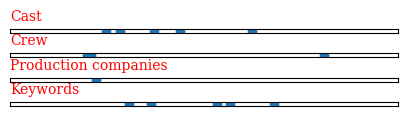

In [30]:
print('Movie: ' + movies_sample.iloc[0][1] + '\nRating: ' + str(movies_sample.iloc[0][-1]) + '\n')
plot_bin(movies_sample.iloc[0])

Movie:Major Dundee
Rating: 6.2



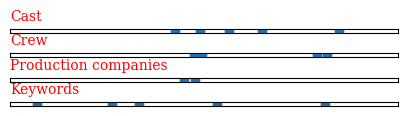

In [31]:
print('Movie:' + movies_sample.iloc[1][1] + '\nRating: ' + str(movies_sample.iloc[1][-1]) + '\n')
plot_bin(movies_sample.iloc[1])

Movie:Brothers
Rating: 6.8



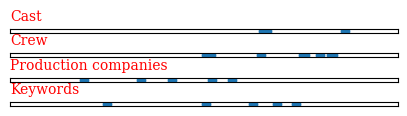

In [32]:
print('Movie:' + movies_sample.iloc[2][1] + '\nRating: ' + str(movies_sample.iloc[2][-1]) + '\n')
plot_bin(movies_sample.iloc[2])

Movie:The Puffy Chair
Rating: 6.2



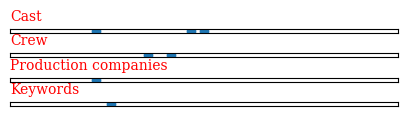

In [33]:
print('Movie:' + movies_sample.iloc[3][1] + '\nRating: ' + str(movies_sample.iloc[3][-1]) + '\n')
plot_bin(movies_sample.iloc[3])

Movie:Primary Colors
Rating: 6.1



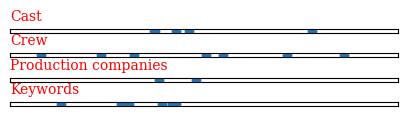

In [34]:
print('Movie:' + movies_sample.iloc[4][1] + '\nRating: ' + str(movies_sample.iloc[4][-1]) + '\n')
plot_bin(movies_sample.iloc[4])

In [35]:

def split_arr(arr, n_splits): 
      
    # looping till length l 
    for i in range(0, len(arr), n_splits):  
        yield arr[i:i + n_splits] 

def find_concentration(arr, n = 100): # n is the number of concentration points to find
    #seperate array into batches
    batches = list(split_arr(arr,int(len(arr)/n)))
    concentrations = []
    for i in range(len(batches)):
        point = 0
        num_ones = 0
        for j in range(len(batches[i])):
            if batches[i][j] == 1:
                point += j + (i * int(len(arr)/n)) # adding correction for batches
                num_ones += 1
        if num_ones > 0:
            point = point/num_ones
            concentrations.append((point,num_ones))
    return concentrations

In [36]:
def to_concentrations(df, feature_names):
    for feature_name in feature_names:
        print('feature: ', feature_name)
        df[feature_name] = df[feature_name].apply(lambda x: find_concentration(x))
    return df

In [37]:
movies_shortened = to_concentrations(movies_shortened, ['cast', 'crew', 'production_companies', 'keywords'])

feature:  cast
feature:  crew
feature:  production_companies
feature:  keywords


In [38]:
movies_shortened.sample(10)

,id,original_title,cast,crew,production_companies,keywords,vote_average
99,9799,The Fast and the Furious,"[(3391.0, 1), (3405.0, 1), (4162.0, 1), (4701....","[(2088.0, 1), (3667.0, 1), (4412.0, 1), (5498....","[(1434.0, 1), (2394.0, 1), (2680.0, 1), (3293....","[(2979.0, 1), (3259.0, 1), (3571.0, 1), (3746....",6.6
3685,77987,Only God Forgives,"[(1101.0, 1), (2134.0, 1), (2236.0, 1), (6125....","[(3035.0, 2), (5650.0, 1), (7489.0, 1), (8162....","[(956.0, 1), (1643.0, 1), (2669.0, 1), (3102.0...","[(1114.5, 2), (1322.0, 1), (1571.0, 1), (3562....",5.6
581,200,Star Trek: Insurrection,"[(3068.0, 1), (5180.0, 1), (5596.0, 3)]","[(2998.0, 1), (4226.0, 1), (7293.0, 1), (7514....","[(2363.0, 1)]","[(3879.0, 1), (4017.0, 1), (6206.0, 1), (7041....",6.3
3642,199933,Atlas Shrugged Part III: Who is John Galt?,"[(242.66666666666666, 3), (1692.0, 1), (4308.0...","[(289.5, 2), (634.0, 1), (825.3333333333334, 3...","[(77.0, 1)]","[(175.0, 1), (673.0, 1)]",3.9
3734,11386,The Crying Game,"[(3029.0, 1), (5277.0, 2), (7366.0, 1), (7558....","[(7536.0, 1), (8202.0, 1), (8315.0, 2), (9547....","[(2078.0, 1), (2891.0, 1), (3881.0, 1), (3934....","[(2487.0, 1), (3050.0, 1), (4363.0, 1), (5294....",6.9
1999,227707,The Adventurer: The Curse of the Midas Box,"[(1112.0, 1), (2068.0, 1), (3840.0, 1), (4367....","[(1461.0, 2), (1535.8333333333333, 6), (4547.0...","[(480.0, 1), (501.8, 5), (815.0, 1), (950.0, 1...","[(1884.0, 1), (3192.0, 1), (3599.0, 1), (4699....",5.1
4429,271185,Ask Me Anything,"[(1745.0, 1), (2257.0, 1), (2660.0, 1), (5581....","[(2510.3333333333335, 3), (3200.0, 1), (3749.0...","[(859.5, 2), (906.0, 2)]","[(1878.0, 1), (2307.0, 1), (4376.0, 1)]",5.5
3304,182873,Green Street Hooligans: Underground,"[(721.0, 1), (912.0, 1), (1680.0, 2), (2155.0,...","[(2205.6666666666665, 6), (2322.0, 3)]","[(796.0, 1)]","[(1295.0, 1)]",5.4
1232,38357,Morning Glory,"[(3360.0, 1), (4409.0, 1), (5234.0, 1), (6452....","[(4825.0, 1), (5754.0, 1), (6991.0, 1), (7526....","[(2086.0, 1), (3605.0, 1)]","[(1812.0, 1), (2958.0, 1), (3703.0, 1)]",6.1
4081,582,Das Leben der Anderen,"[(7246.0, 1), (8656.0, 1), (8759.5, 2), (9102....","[(6403.0, 1), (8843.0, 1), (10691.0, 1), (1199...","[(4652.0, 1), (4668.0, 1), (4893.0, 1), (4915....","[(2659.0, 1), (3585.0, 1), (3719.0, 1), (4281....",7.9


In [39]:
def w_avg(arr):
    weight = 0 #weight
    s = 0 # position*weight
    for element in arr:
        s += (element[0] * element[1])
        weight += element[1]
    return s/weight #weighted average

In [40]:
def to_weighted_avg(df, feature_names):
    for feature_name in feature_names:
        print('Current: ', feature_name)
        df[feature_name] = df[feature_name].apply(lambda x: w_avg(x))
    return df

In [41]:
movies_shortened = to_weighted_avg(movies_shortened, ['cast', 'crew', 'production_companies', 'keywords'])

Current:  cast
Current:  crew
Current:  production_companies
Current:  keywords


In [42]:
movies_shortened['vote_average'] = movies['vote_average']

In [43]:
movies_shortened.sample(10)

,id,original_title,cast,crew,production_companies,keywords,vote_average
2425,16028,They,2378.2,3641.125000,2140.750000,2717.833333,4.6
3452,20322,The Brothers,5388.6,2141.000000,1103.000000,6577.666667,6.5
2502,185567,Zulu,6630.8,9303.200000,3035.142857,1295.000000,6.7
998,12634,The Big Bounce,3160.8,3507.500000,836.000000,3174.300000,5.0
3565,11843,The Return of the Pink Panther,7157.0,8249.000000,3401.000000,4240.200000,6.7
2852,57157,Young Adult,4541.6,6990.777778,2316.333333,4223.833333,5.6
4482,18734,L.I.E. Long Island Expressway,6154.4,9867.666667,1103.000000,3735.000000,6.7
101,49538,X-Men: First Class,6188.0,9072.444444,2238.333333,5385.666667,7.1
3473,15256,200 Cigarettes,4057.0,5394.333333,2363.000000,3906.000000,6.1
1355,9776,Head of State,2931.0,3250.000000,2499.500000,4134.600000,5.3


In [44]:
feat_df = movies_shortened[['cast', 'crew', 'production_companies', 'keywords']] #extract only features from df, and scale

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feat_scaled = pd.DataFrame(scaler.fit_transform(feat_df.astype(float)))
feat_scaled.index = feat_df.index
feat_scaled.columns = feat_df.columns

#Seperate dataframe for target
target_df = pd.DataFrame()
target_df['ratings'] =  movies_shortened['vote_average']

In [46]:
feat_scaled.sample(10)

,cast,crew,production_companies,keywords
3909,0.493411,0.573689,0.631716,0.441296
1276,0.429713,0.382751,0.465467,0.223470
1661,0.331973,0.473229,0.297614,0.309325
3466,0.538113,0.651808,0.488522,0.493210
3839,0.942164,0.819859,0.834648,0.637344
2394,0.278565,0.249861,0.204157,0.271976
4376,0.599053,0.591379,0.565557,0.341400
3384,0.559193,0.655840,0.736969,0.615442
1925,0.432687,0.566863,0.543404,0.419953
4222,0.471049,0.558142,0.470128,0.506227


Text(0.5, 1.0, 'keywords')

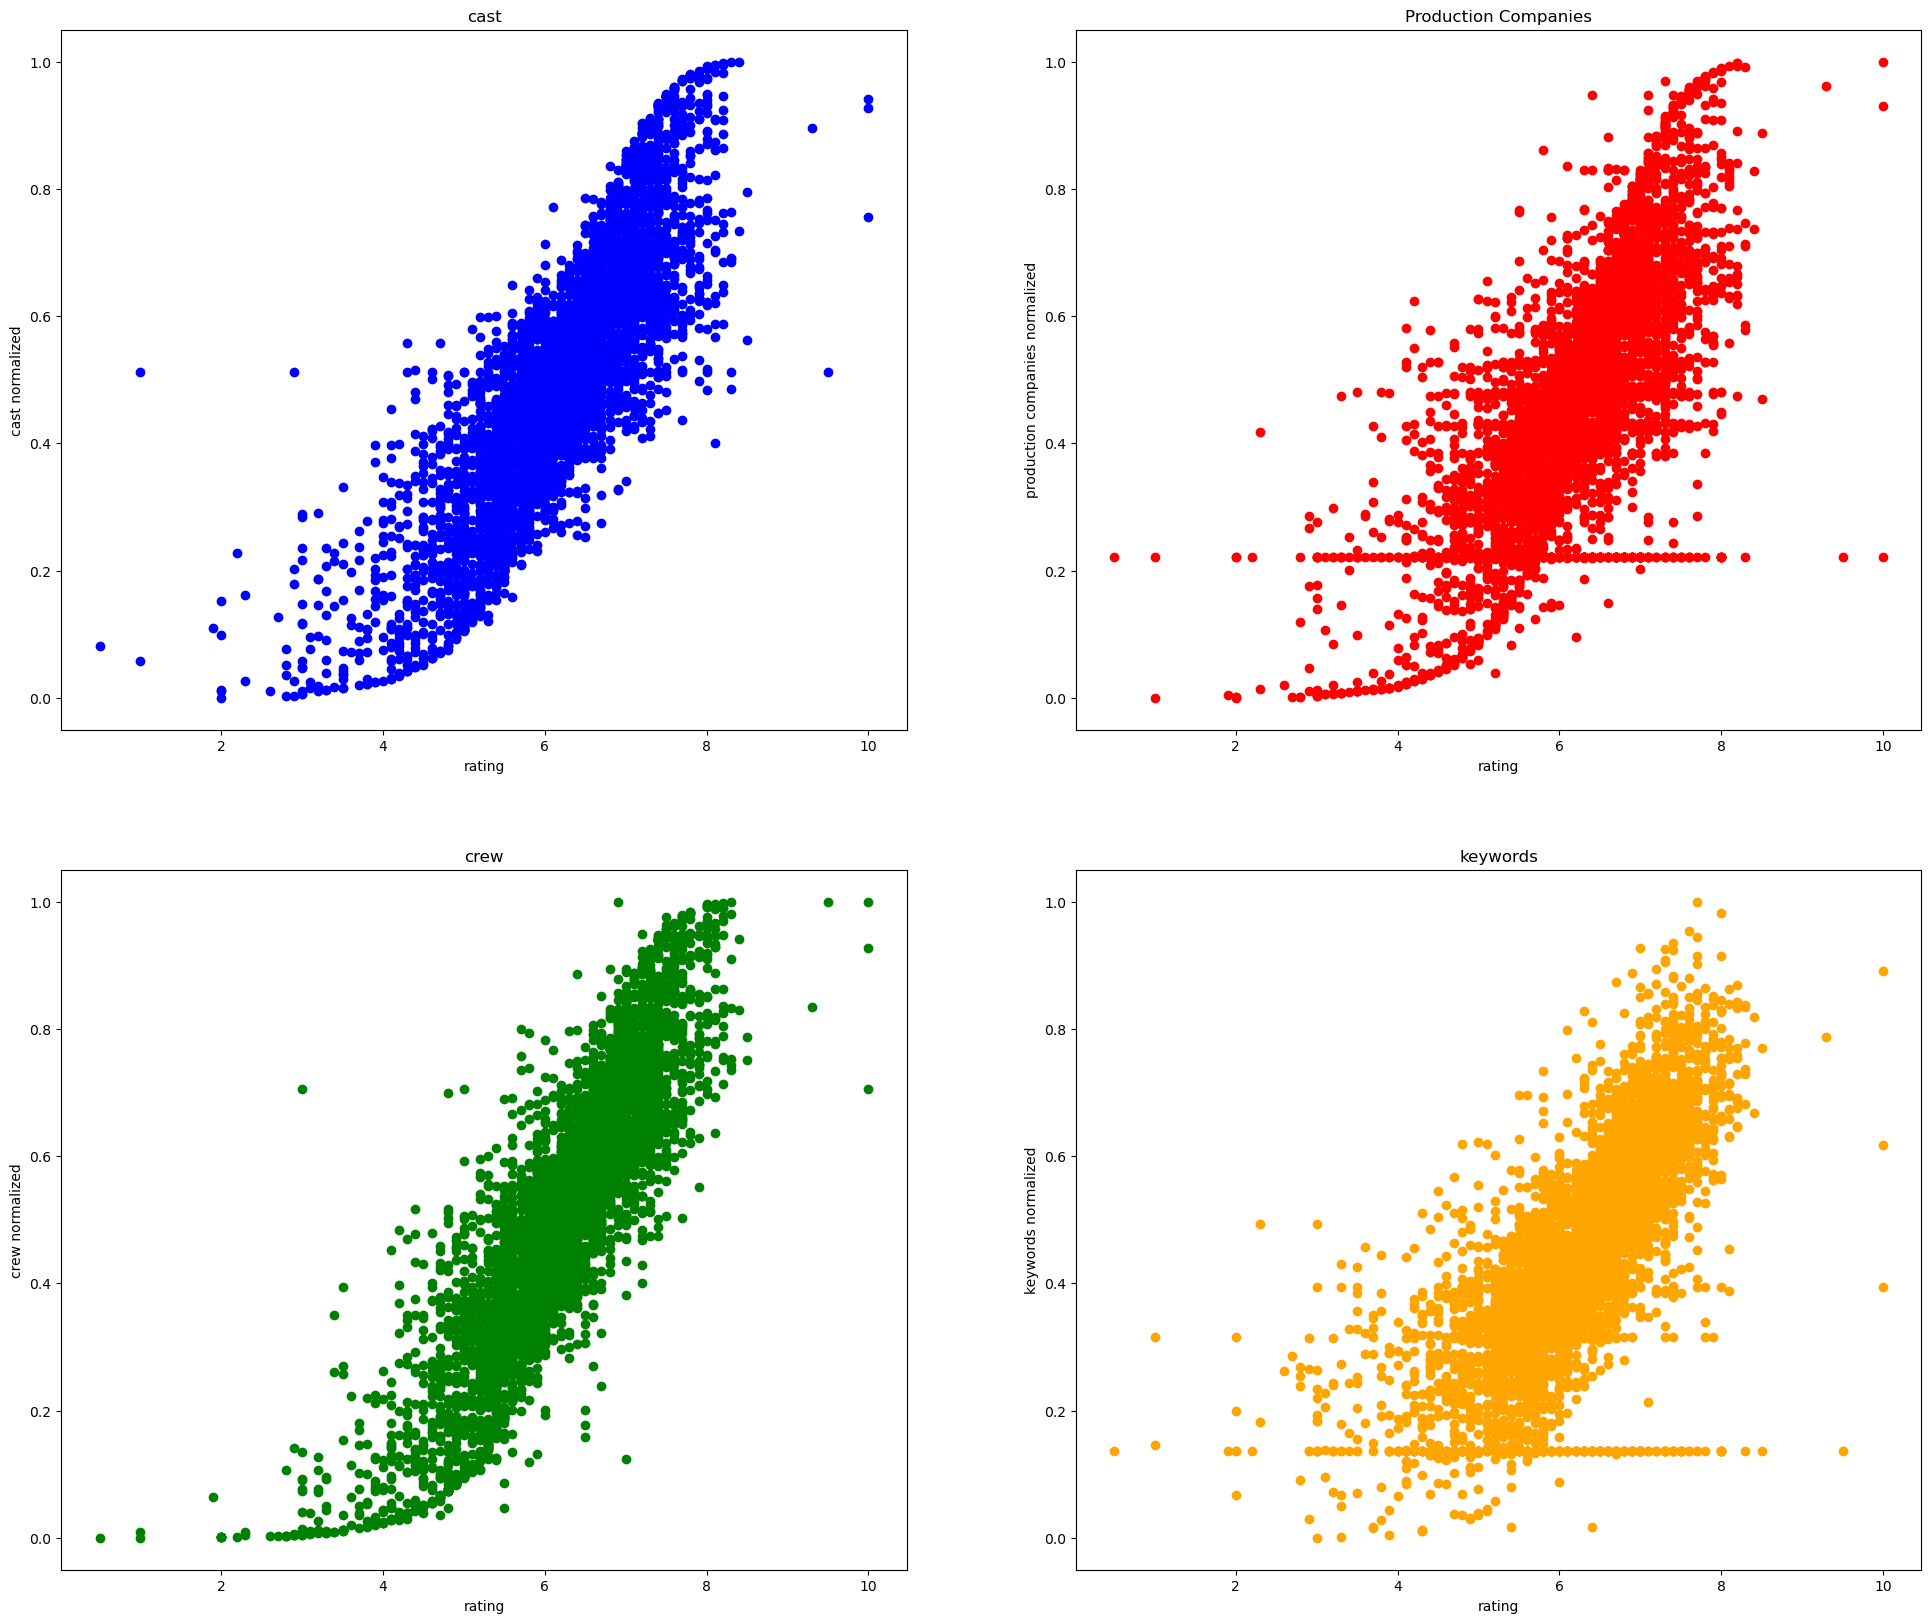

In [47]:
fig, ax = plt.subplots(2,2, figsize=(24,20))

ax[0,0].scatter(target_df['ratings'], feat_scaled['cast'], facecolor='blue')
ax[0,0].set_xlabel('rating')
ax[0,0].set_ylabel('cast normalized')
ax[0,0].set_title('cast')

ax[1,0].scatter(target_df['ratings'], feat_scaled['crew'], facecolor='green')
ax[1,0].set_xlabel('rating')
ax[1,0].set_ylabel('crew normalized')
ax[1,0].set_title('crew')

ax[0,1].scatter(target_df['ratings'], feat_scaled['production_companies'], facecolor='red')
ax[0,1].set_xlabel('rating')
ax[0,1].set_ylabel('production companies normalized')
ax[0,1].set_title('Production Companies')

ax[1,1].scatter(target_df['ratings'], feat_scaled['keywords'], facecolor='orange')
ax[1,1].set_xlabel('rating')
ax[1,1].set_ylabel('keywords normalized')
ax[1,1].set_title('keywords')


In [48]:
from sklearn.model_selection import train_test_split
def train_test_val_split(df_feat, df_target, train_frac):
    train_features, test_features, train_target, test_target = train_test_split(df_feat, df_target, test_size = train_frac) #splitting training from rest of the dataset
    return (train_features, train_target), (test_features, test_target)

In [49]:
(features_train, target_train), (features_test, target_test) = train_test_val_split(feat_scaled, target_df,0.7)

In [50]:
target_train.head()

,ratings
1682,5.6
2106,6.2
3792,6.1
2675,6.6
3374,7.4


In [51]:
from sklearn.linear_model import BayesianRidge

In [52]:
reg = BayesianRidge()
reg.fit(features_train.values, target_train)

BayesianRidge()

In [53]:
target_pred = reg.predict(features_test.values)


Score for predictions: 0.7982609869083253


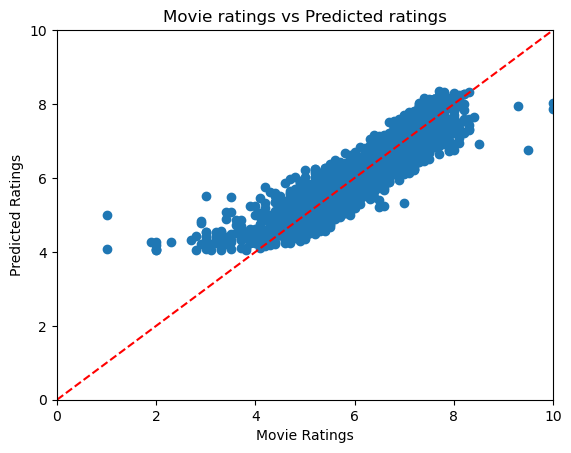

In [57]:
plt.axis([0,10,0,10])
plt.scatter(target_test, target_pred)

index_arr = [n for n in range(11)]
plt.plot(index_arr,'r--')             
plt.xlabel("Movie Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Movie ratings vs Predicted ratings")
from sklearn.metrics import r2_score

score = r2_score(target_test, target_pred)

print("Score for predictions:", score)